In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, preprocessing
import os

# 1. Write a small paragraph describing the dataset that you choose, its features, number of instances, nature of the data, and anything else that you found to be interesting.

**Answer**:  The data set I'm choosing is called Car Evaluation Data Set. It contains 1728 instance with 6 features and one class. The 6 features are: Buying - car price, Maintanence - price to maintain, Doors - number of doors, Persons - number of people, Lug_Boots - size of luggage boot, and Safety - estimated safety of the car. The class attribute is how acceptable each instance is and one interesting fact I observed is that over 70% of the instances in this data set are unacceptable. 

# 2. Provide a brief analysis of the dataset you downloaded. Does it have missing data? Are the features numeric/discrete/categorical? Create some histograms/boxplots/other visualizations to illustrate the content o the dataset.

**Answer**: This data set does not contain any missing data and all of the features are categorical.Each feature has pretty nice homogeneous values as shown below.

In [2]:
fileURL = "car.data"
car_data = pd.read_csv(fileURL, names=['Buying', 'Maintainence', 'Doors', 'Persons', 'Lug_Boots', 'Safety', 'Acceptability'] , header=None)

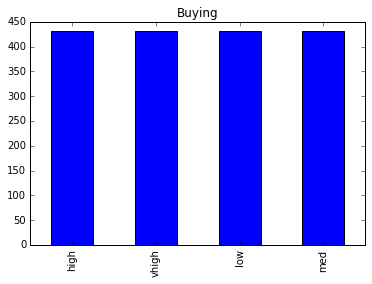

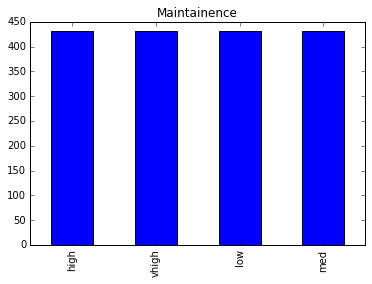

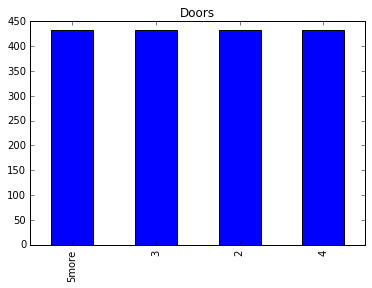

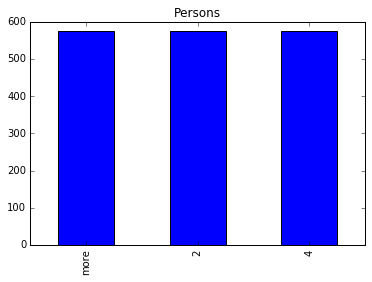

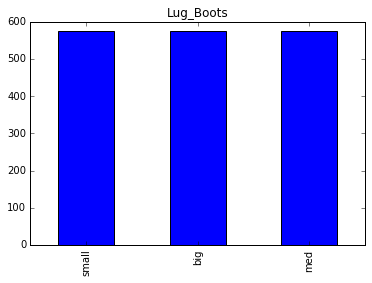

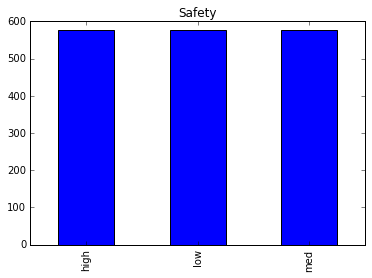

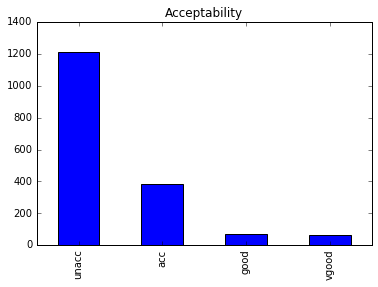

In [3]:
for feature in car_data:
    car_data[feature].value_counts().plot(kind='bar',title=feature)
    plt.show()

# 3. Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can be used to generate predicions for your data. A reference to how you can do that can be found on scikit-learn.

In [4]:
lex = preprocessing.LabelEncoder()
x = car_data.ix[:,0:6].as_matrix()
new_x = lex.fit_transform(x[0])
for i in x[1:]:
    new_x = np.vstack([new_x, lex.fit_transform(i)])
ley = preprocessing.LabelEncoder()    
y = car_data['Acceptability'].as_matrix()
y = ley.fit_transform(y)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(new_x, y)

# 4. The link above explains how you can generate a visual output for the tree you just trained. Use that code snippet to create a visualization of your tree.

In [5]:
import pydotplus
with open("car.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, 
                             feature_names=['Buying', 'Maintainence', 'Doors', 'Persons', 'Lug_Boots', 'Safety'],
                             class_names=['unacc', 'acc', 'good', 'vgood'])

In [6]:
os.unlink("car.dot")

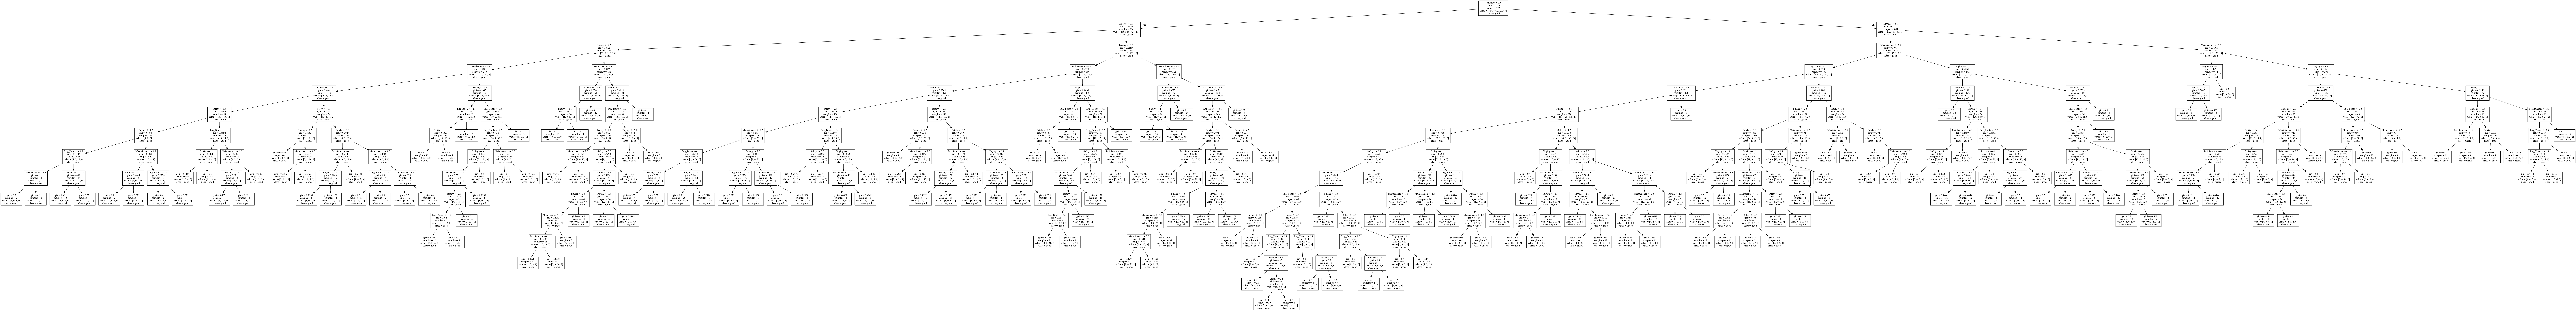

In [7]:
from IPython.display import Image
Image("car.png")

# 5. Create a new instance with your choice of values for each of the features. Use your trained model to generate a prediction for it. Using your tree illustration as a reference, write a short paragraph describing how your model went about generating that specific prediction. Does it make sense to you? Can it be improved? Go back and play with the parameters that you used for training your tree and see if you can obtain better results.

In [8]:
new_instance = ["med","meg","5more","more","big","high"]
inputX = lex.fit_transform(new_instance)
print(inputX)
print(clf.predict(inputX))
print(ley.inverse_transform(clf.predict(inputX)))

[3 4 0 5 1 2]
[3]
['vgood']


G:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
G:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


According to the graph, It first check if Person <= 0.5, in this case it's false. Then we move to check if Buying <= 3.5, in this case it's true. Then we check if Maintainance <= 3.5, in this case it's false. Then we check if Buying <= 2.5, in this case it's false. Then we check if X[3] <= 4.5, in this case it's false. Then we got the result of {gini = 0.0, samples = 4, values = [0,0,0,4], class = vgood}.